In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv("data.csv")
X = df.drop(['Buys', 'ID'], axis = 1)
Y = df['Buys']

X['Age'] = X['Age'].map({'< 21' : 0, '21-35' : 1, '> 35' : 3})
X['Income'] = X['Income'].map({'High' : 0, 'Medium' : 1, 'Low' : 2})
X['Gender'] = X['Gender'].map({'Male':0,'Female':1})
X['Martial Status'] = X['Martial Status'].map({'Single':0,'Married':1})

print(X.head())
print(Y.head())

   Age  Income  Gender  Martial Status
0    0       0       0               0
1    0       0       0               1
2    1       0       0               0
3    3       1       0               0
4    3       2       1               0
0     No
1     No
2    Yes
3    Yes
4    Yes
Name: Buys, dtype: object


In [33]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 5)

clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

print(clf.predict([[0, 1, 0, 0]]))
Y_pred = clf.predict(X_test)
print(accuracy_score(Y_test, Y_pred))

['Yes']
0.4


In [34]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm)

[[1 2]
 [1 1]]


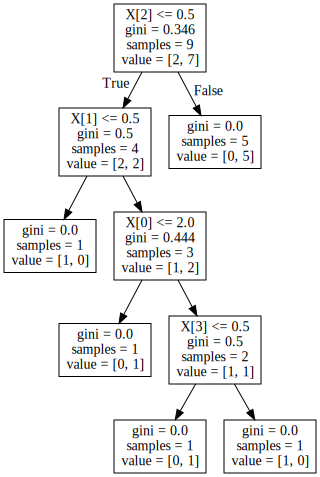

In [37]:
#conda install python-graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)  
graph